# Multi model comparison

In [1]:
import numpy as np
from fmskill.model import ModelResult, ModelResultCollection
from fmskill.observation import PointObservation, TrackObservation

In [2]:
%load_ext autoreload
%autoreload 2

## Define observations

In [3]:
o1 = PointObservation('../tests/testdata/SW/HKNA_Hm0.dfs0', item=0, x=4.2420, y=52.6887, name="HKNA")
o2 = PointObservation("../tests/testdata/SW/eur_Hm0.dfs0", item=0, x=3.2760, y=51.9990, name="EPL")
o3 = TrackObservation("../tests/testdata/SW/Alti_c2_Dutch.dfs0", item=3, name="c2")

## Define models

In [4]:
mr1 = ModelResult('../tests/testdata/SW/HKZN_local_2017_DutchCoast.dfsu', name='SW_1')
mr2 = ModelResult('../tests/testdata/SW/HKZN_local_2017_DutchCoast_v2.dfsu', name='SW_2')

## Collection of model results

In [5]:
mrc = ModelResultCollection([mr1, mr2])

In [6]:
mrc.add_observation(o1, item=0)
mrc.add_observation(o2, item=0)
mrc.add_observation(o3, item=0)
mrc.observations

{'HKNA': PointObservation: HKNA, x=4.242, y=52.6887,
 'EPL': PointObservation: EPL, x=3.276, y=51.999,
 'c2': TrackObservation: c2, n=298}

In [7]:
cc = mrc.extract()    # returns a collection of comparisons

In [8]:
cc["EPL"]   # select a single comparer from the collection like this

<PointComparer>
Observation: EPL

## Perform analysis
You can perform simple filtering on specific `observation` or specific `model`. You can refer to observations and models using their _name_ or _index_. 

The main analysis methods are:
* skill()
* mean_skill()
* scatter()

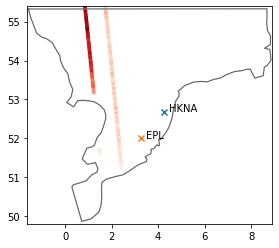

In [9]:
mrc.plot_observation_positions();

In [10]:
cc.skill(model="SW_1")

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
HKNA,385,-0.195266,0.352283,0.293214,0.251992,0.971082,0.088488,0.988697
EPL,66,-0.075335,0.216357,0.202817,0.183641,0.972467,0.073902,0.993785
c2,113,-0.001210,0.351796,0.351794,0.294585,0.974335,0.118511,0.985955


In [11]:
cc.skill(observation="c2")

,n,bias,rmse,urmse,mae,cc,si,r2
model,,,,,,,,
SW_2,113,0.081431,0.430268,0.422492,0.357138,0.974335,0.142327,0.978991
SW_1,113,-0.001210,0.351796,0.351794,0.294585,0.974335,0.118511,0.985955


In [12]:
cc.mean_skill(model=0, observation=[0,"c2"])

,bias,rmse,urmse,mae,cc,si,r2
SW_1,-0.098238,0.35204,0.322504,0.273288,0.972708,0.103499,0.987326


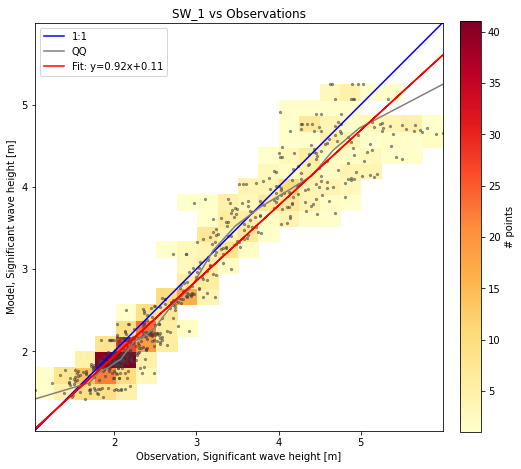

In [13]:
cc.scatter(model='SW_1', cmap='YlOrRd')

### Time series plot (specifically for point comparisons)
If you select an comparison from the collection which is a PointComparer, you can do a time series plot

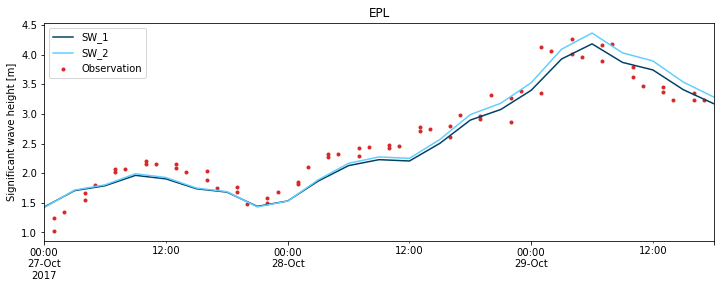

In [14]:
cc['EPL'].plot_timeseries(figsize=(12,4));

## Filtering on time
Use the `start` and `end` arguments to do your analysis on part of the time series

In [15]:
cc.skill(model="SW_1", end='2017-10-28')

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
HKNA,281,-0.098125,0.203006,0.177716,0.164239,0.969014,0.067014,0.994140
EPL,48,-0.110532,0.227094,0.198379,0.193293,0.932614,0.087529,0.989960
c2,72,-0.188193,0.313787,0.251089,0.258661,0.478554,0.122423,0.976593


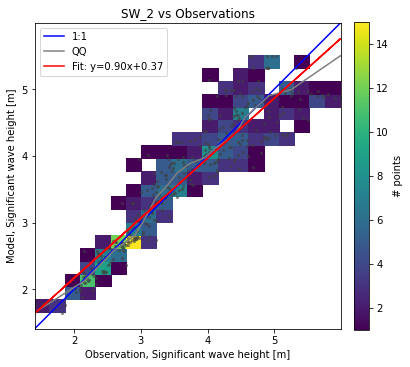

In [16]:
cc.scatter(model='SW_2', start='2017-10-28', figsize=(6,7))

## Filtering on area
You can do you analysis in a specific `area` by providing a bounding box or a closed polygon

In [17]:
bbox = np.array([0.5,52.5,5,54])
polygon = np.array([[6,51],[0,55],[0,51],[6,51]])

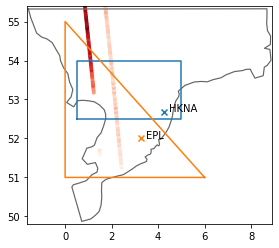

In [18]:
ax = mrc.plot_observation_positions();
ax.plot([bbox[0],bbox[2],bbox[2],bbox[0],bbox[0]],[bbox[1],bbox[1],bbox[3],bbox[3],bbox[1]]);
ax.plot(polygon[:,0],polygon[:,1]);

In [19]:
cc.skill(model="SW_1", area=bbox)

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
HKNA,385,-0.195266,0.352283,0.293214,0.251992,0.971082,0.088488,0.988697
c2,42,-0.055870,0.388404,0.384365,0.336023,0.952688,0.139796,0.980044


In [20]:
cc.scatter(model="SW_2", area=polygon, backend='plotly')